source: https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_train = pd.read_csv("./datasets/titanic/train.csv")
df_test = pd.read_csv('./datasets/titanic/test.csv')

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Use corr function to find out the linear correlation between survived and other numerical features. 
Seeing there is a strong correlation between Survived and the features of Fare and Pclass.

The first one have strong positive relation, and the last one in the sorted list has the strong negative relation. 

In [62]:
corr_matrix = df_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

/tmp/ipykernel_400314/2478019976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Visualize the correlation of survived and other non numerical features

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
# Fill up Embarked with mode value
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

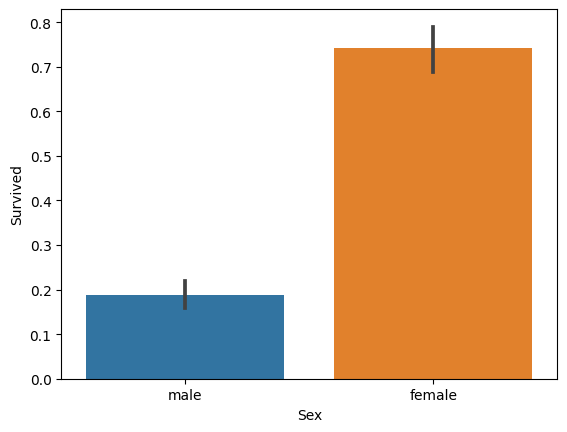

In [65]:
sns.barplot(data=df_train, x="Sex", y="Survived")


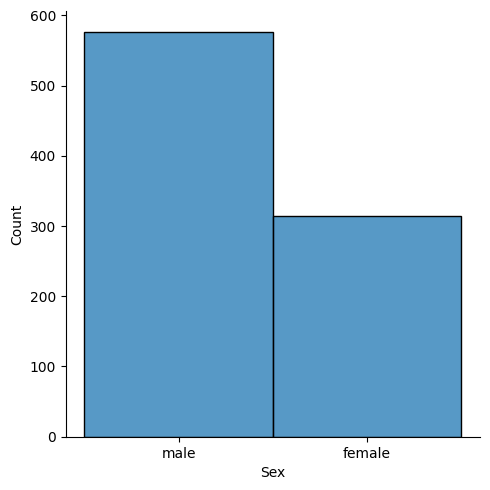

In [66]:
sns.displot(df_train['Sex'])

<AxesSubplot: xlabel='Embarked', ylabel='Count'>

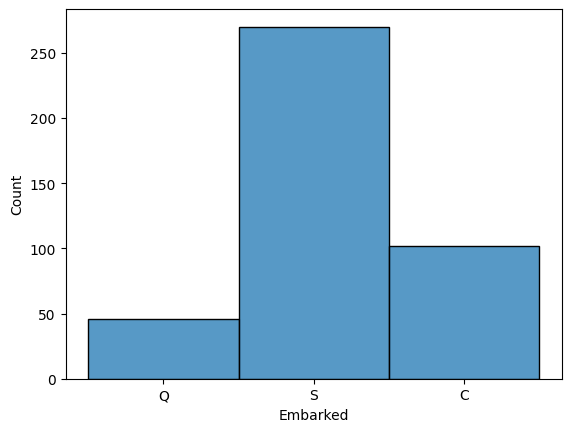

In [67]:
sns.histplot(df_test['Embarked'])

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

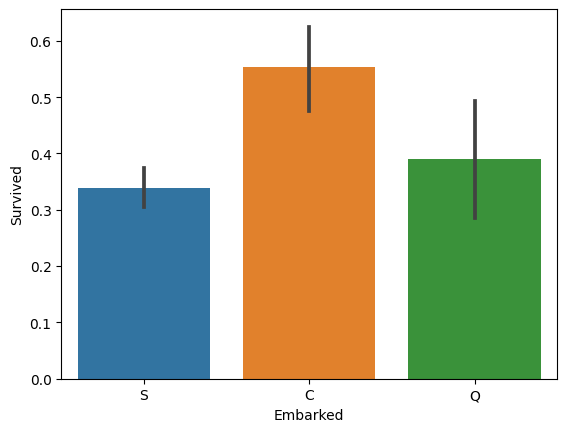

In [68]:
sns.barplot(data=df_train, x="Embarked", y="Survived")


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

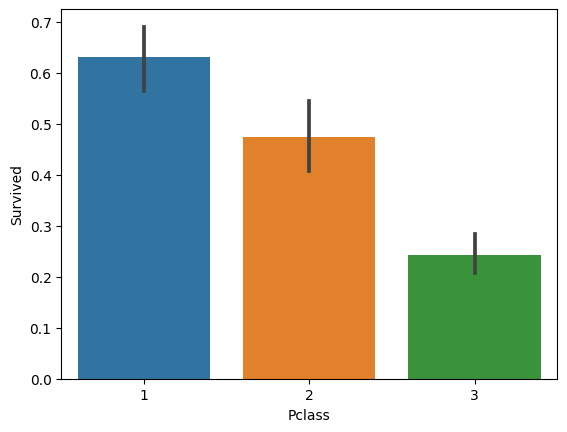

In [69]:
sns.barplot(data=df_train, x="Pclass", y="Survived")

In [70]:
q = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']

df_train_set = df_train.drop(q, axis=1)
df_test_set = df_test.drop(q, axis=1)

In [71]:
df_test_set.head()

,Pclass,Sex,Fare,Embarked
0,3,male,7.8292,Q
1,3,female,7.0000,S
2,2,male,9.6875,Q
3,3,male,8.6625,S
4,3,female,12.2875,S


In [72]:
mean = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean)

df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB


Translate non-numerical features to numerical features

In [73]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

Original way in the article:
`df_train_set.iloc[:, 2] = labelencoder.fit_transform(df_train_set.iloc[:, 2].values)`

for some reason doesn't work properly, so changed to my own way to do the encoding


In [74]:

df_train_set["Sex"] = df_train_set["Sex"].apply(lambda sex: 0 if sex == 'male' else 1)
df_test_set["Sex"] = df_test_set["Sex"].apply(lambda sex: 0 if sex == 'male' else 1)

In [75]:
embarked_map = {"S": 2, "C": 1, "Q": 0}

df_train_set["Embarked"] = df_train_set["Embarked"].apply(
    lambda embarked: embarked_map[embarked]
)

df_test_set["Embarked"] = df_test_set["Embarked"].apply(
    lambda embarked: embarked_map[embarked]
)


In [76]:
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,0,7.2500,2
1,1,1,1,71.2833,1
2,1,3,1,7.9250,2
3,1,1,1,53.1000,2
4,0,3,0,8.0500,2


In [77]:
df_test_set.head()

,Pclass,Sex,Fare,Embarked
0,3,0,7.8292,0
1,3,1,7.0000,2
2,2,0,9.6875,0
3,3,0,8.6625,2
4,3,1,12.2875,2


## Train data Split

In [78]:
# X are the features, Y are the labels

X = df_train_set.iloc[:, 1:5].values
Y = df_train_set.iloc[:, 0].values

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=4)


In [80]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(534, 4)
(534,)
(357, 4)
(357,)


## k-nearest neighbors model

In [81]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,26)
scores = []

for k in k_range:
	# Initialize KNN classifier
	knn = KNeighborsClassifier(n_neighbors=k)
	
	# Fit the training data to knn, (features, labels)
	knn.fit(X_train, Y_train)

	# Get the Y prediction by inputting test features
	Y_pred = knn.predict(X_test)

	# Calculate the accuracy score by (source of truth, prediction)
	scores.append(metrics.accuracy_score(Y_test, Y_pred))



Text(0, 0.5, 'Testing Accuracy')

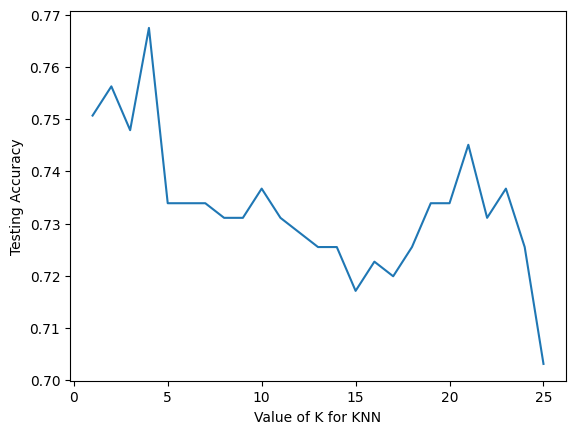

In [82]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel("Testing Accuracy")



In [83]:
scores_df = pd.DataFrame(scores, index=range(1,26))
scores_df.sort_values(by=0, ascending=False)


,0
4,0.767507
2,0.756303
1,0.750700
3,0.747899
21,0.745098
23,0.736695
10,0.736695
19,0.733894
7,0.733894
6,0.733894


In [84]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.2 KB


In [85]:
test = df_test_set.iloc[:, :].values

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)

Y_pred = knn.predict(test)

prediction_df =  pd.DataFrame(Y_pred, columns=['Survived'] )
prediction_df.index = df_test['PassengerId']

In [87]:
prediction_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [94]:
prediction_df.to_csv('./datasets/titanic/prediction.csv')

In [95]:
result_df = pd.read_csv('./datasets/titanic/gender_submission.csv')

metrics.accuracy_score(result_df['Survived'], prediction_df['Survived'])

0.784688995215311